In [3]:
# evaluate prophet time series forecasting model on hold out dataset
import pandas as pd
from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [4]:
# load data
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv'
df = pd.read_csv(path, header=0)

<AxesSubplot:>

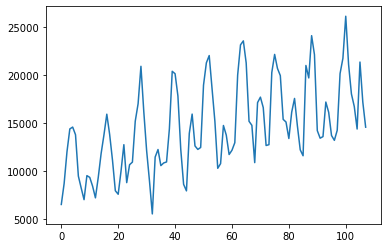

In [26]:
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])
df['y'].plot()

In [27]:
# create test dataset, remove last 12 months
train = df.drop(df.index[-12:])
train.tail()

,ds,y
91,1967-08-01,13434
92,1967-09-01,13598
93,1967-10-01,17187
94,1967-11-01,16119
95,1967-12-01,13713


In [13]:
# define the model
model = Prophet()

In [14]:
# fit the model
model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [28]:
model.plot_components()

TypeError: plot_components() missing 1 required positional argument: 'fcst'

In [16]:
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
    date = '1968-%02d' % i
    future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = to_datetime(future['ds'])

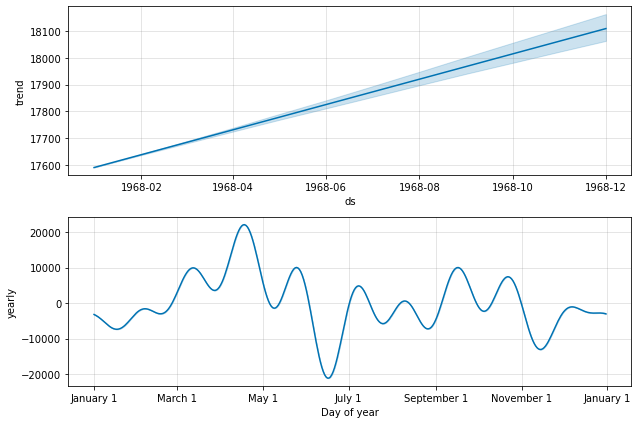

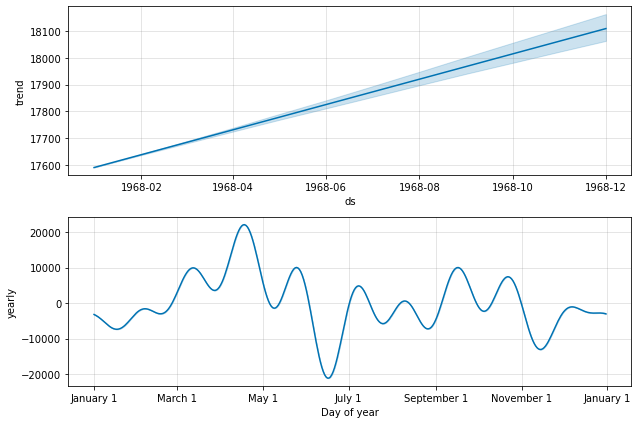

In [29]:
# use the model to make a forecast
forecast = model.predict(future)
model.plot_components(forecast)

In [18]:
# calculate MAE between expected and predicted values for december
y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 1336.814


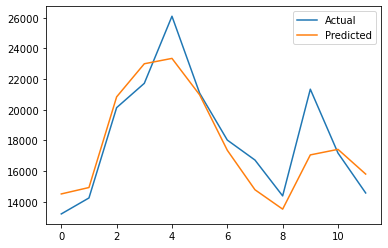

In [19]:
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()